In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
dt = pd.read_csv("heart.csv")
dt.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [83]:
dt.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [84]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [85]:
dt.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [86]:
dt["ST_Slope"].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [87]:
dt["RestingECG"].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [88]:
dt["ChestPainType"].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [89]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
c_transform = ["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]
dt["Sex"] = lb.fit_transform(dt["Sex"])
dt["ChestPainType"] = lb.fit_transform(dt["ChestPainType"])
dt["RestingECG"] = lb.fit_transform(dt["RestingECG"])
dt["ExerciseAngina"] = lb.fit_transform(dt["ExerciseAngina"])
dt["ST_Slope"] = lb.fit_transform(dt["ST_Slope"])

In [90]:
dt.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
5,39,1,2,120,339,0,1,170,0,0.0,2,0
6,45,0,1,130,237,0,1,170,0,0.0,2,0
7,54,1,1,110,208,0,1,142,0,0.0,2,0
8,37,1,0,140,207,0,1,130,1,1.5,1,1
9,48,0,1,120,284,0,1,120,0,0.0,2,0


In [91]:
dt.tail(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
908,63,1,0,140,187,0,0,144,1,4.0,2,1
909,63,0,0,124,197,0,1,136,1,0.0,1,1
910,41,1,1,120,157,0,1,182,0,0.0,2,0
911,59,1,0,164,176,1,0,90,0,1.0,1,1
912,57,0,0,140,241,0,1,123,1,0.2,1,1
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1
917,38,1,2,138,175,0,1,173,0,0.0,2,0


In [92]:
dt["ST_Slope"].value_counts()

1    460
2    395
0     63
Name: ST_Slope, dtype: int64

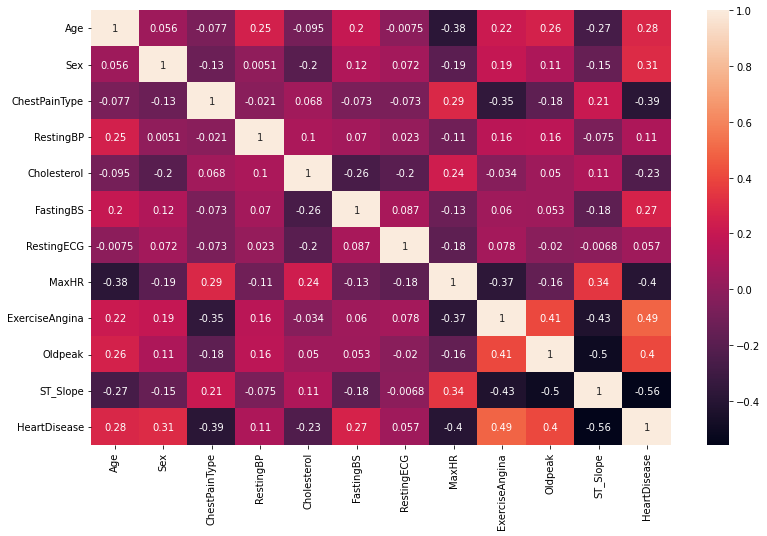

In [93]:
plt.figure(figsize=(13,8))
sns.heatmap(dt.corr(),annot=True)

In [94]:
dt.corr().sort_values(by='HeartDisease')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
ST_Slope,-0.268264,-0.150693,0.213521,-0.075162,0.111471,-0.175774,-0.006778,0.343419,-0.428706,-0.501921,1.000000,-0.558771
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


In [95]:
x = dt.iloc[:,:-1].values
x[0:5]

array([[ 40. ,   1. ,   1. , 140. , 289. ,   0. ,   1. , 172. ,   0. ,
          0. ,   2. ],
       [ 49. ,   0. ,   2. , 160. , 180. ,   0. ,   1. , 156. ,   0. ,
          1. ,   1. ],
       [ 37. ,   1. ,   1. , 130. , 283. ,   0. ,   2. ,  98. ,   0. ,
          0. ,   2. ],
       [ 48. ,   0. ,   0. , 138. , 214. ,   0. ,   1. , 108. ,   1. ,
          1.5,   1. ],
       [ 54. ,   1. ,   2. , 150. , 195. ,   0. ,   1. , 122. ,   0. ,
          0. ,   2. ]])

In [96]:
y = dt.iloc[:,-1:].values
y[0:5]

array([[0],
       [1],
       [0],
       [1],
       [0]])

In [97]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

print(x_train[0:5])
print(y_test[0:5])

[[ 32.    1.    0.  118.  529.    0.    1.  130.    0.    0.    1. ]
 [ 36.    1.    2.  112.  340.    0.    1.  184.    0.    1.    1. ]
 [ 51.    1.    0.   95.    0.    1.    1.  126.    0.    2.2   1. ]
 [ 59.    1.    0.  130.  126.    0.    1.  125.    0.    0.    1. ]
 [ 60.    1.    0.  117.  230.    1.    1.  160.    1.    1.4   2. ]]
[[1]
 [0]
 [1]
 [1]
 [0]]


In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


rg = LogisticRegression()
rg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [99]:
pred = rg.predict(x_test)

In [100]:
score =  accuracy_score(y_test,pred)
score

0.8333333333333334

In [101]:
from sklearn.tree import DecisionTreeClassifier

cl = DecisionTreeClassifier()
cl.fit(x_train,y_train)

pred1 = cl.predict(x_test)
score1 = accuracy_score(y_test,pred1)
score1

0.7862318840579711

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


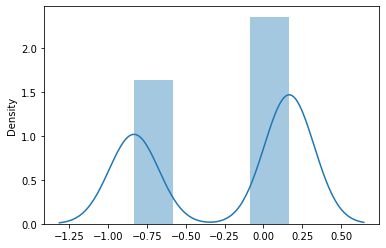

In [102]:
sns.distplot(y_test-score)

In [103]:
import pickle

pickle.dump(rg,open('logistic4.pkl','wb'))


In [104]:
rg

LogisticRegression()

In [105]:
rg.predict([[37,1,1,160,110,1,0,179,1,1.0,1]])

array([1])